In [1]:
# !pip install PyWavelets

In [4]:
import pywt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy.lib.stride_tricks import sliding_window_view


In [2]:
!ls ../data_collection/ohlcv_data

ohlcv_auto.csv		    ohlcv_healthcare.csv  ohlcv_pharma.csv
ohlcv_bank.csv		    ohlcv_it.csv	  ohlcv__privatebank.csv
ohlcv_consumerdurables.csv  ohlcv_media.csv	  ohlcv_psubank.csv
ohlcv_finance.csv	    ohlcv_metal.csv	  ohlcv_realty.csv
ohlcv_fmcg.csv		    ohlcv_oilgas.csv


In [3]:
df = pd.read_csv('../data_collection/ohlcv_data/ohlcv_auto.csv')[['Date', 'Ticker', 'BAJAJ-AUTO.NS']]

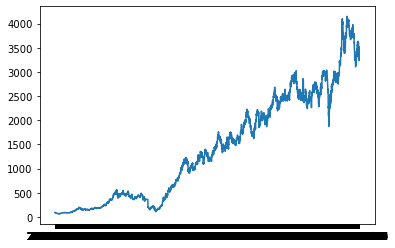

In [4]:
df = df[df['Ticker']=='Adj Close']
df.dropna(inplace=True)
plt.plot(df['Date'], df['BAJAJ-AUTO.NS'])

In [69]:
def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def wavelet_denoising(x, wavelet='haar', decomp_level=4, level=1):
    coeff = pywt.wavedec(x, wavelet, mode="constant", level=decomp_level)
    sigma = (1/0.6745) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode="constant"), coeff

# sm1, _ = wavelet_denoising(df['BAJAJ-AUTO.NS'])

In [32]:
a[:10]

0    0.102578
1    0.331093
2    0.033311
3    0.668891
4    0.587482
5    0.152129
6    0.149382
7    0.675673
8    0.746904
9    0.793695
dtype: float64

In [132]:
def get_wavelet_coeffs(x, len_window=30, axis=1, decomp_level=1):
    x = pd.Series(x)
    xdf = sliding_window_view(x, (len_window), writeable=True)
    x_swdf = pd.DataFrame.from_records(xdf)
    x_swdf_sm_coeff = x_swdf.apply(wavelet_denoising, axis=axis, decomp_level=decomp_level)
    return np.stack(x_swdf_sm_coeff.apply(lambda row : np.array(row[1]).flatten()))

In [134]:
get_wavelet_coeffs(a).shape

(51, 30)

In [135]:
a.shape

(80,)

In [72]:
a = pd.Series(np.random.random(80))
adf = pd.DataFrame(sliding_window_view(a, (10), writeable=True))
adfr = adf.apply(wavelet_denoising, axis=1, decomp_level=1)
adfr.shape

(71,)

In [96]:
adfrs = np.stack(adfr.apply(lambda row : np.array(row[1]).flatten()))
adfrs.shape


(71, 10)

In [102]:
adfrs.shape

(71, 10)

In [104]:
np.hstack([adf, adfrs]).shape

(71, 20)

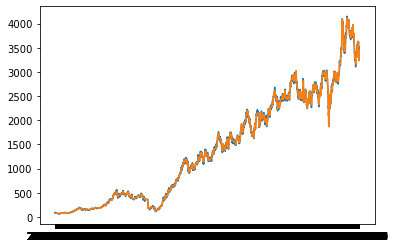

In [7]:
plt.plot(df['Date'], df['BAJAJ-AUTO.NS'])
plt.plot(df['Date'], sm1)
plt.show()